In [2]:
import os
os.getcwd()
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

/tmp/ipykernel_2297423/1916314206.py:34: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(
/tmp/ipykernel_2297423/1916314206.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(df_auroc['Dataset'], rotation=0)  # X轴刻度字体
/tmp/ipykernel_2297423/1916314206.py:52: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(
/tmp/ipykernel_2297423/1916314206.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(df_aupr['Dataset'], rotation=0)  # X轴刻度字体


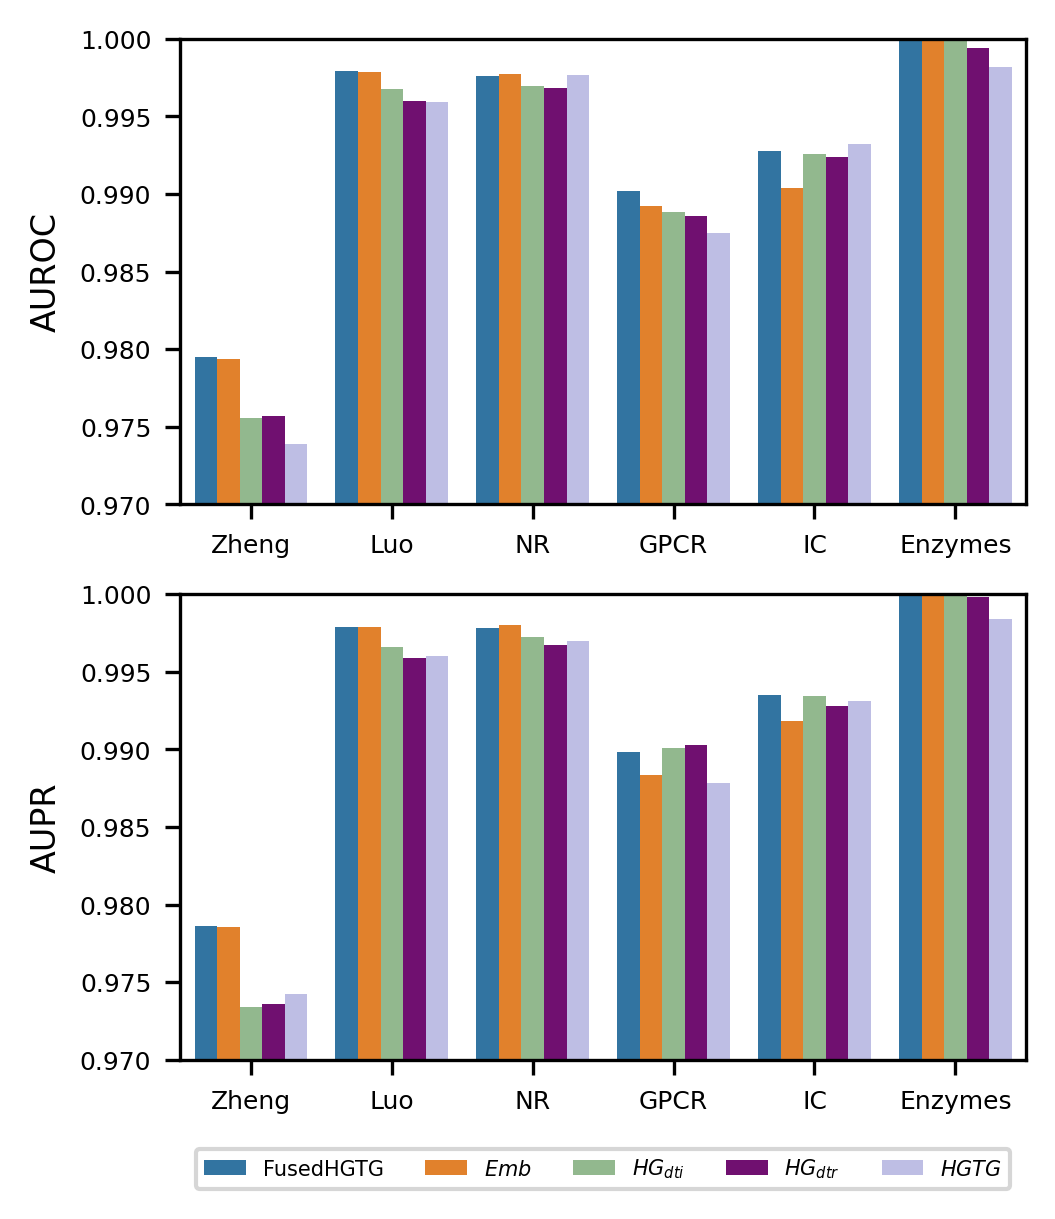

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
auroc_data = {
    'Dataset': ['Zheng', 'Luo',   'NR','GPCR', 'IC','Enzymes'],
    'FusedHGTG':[0.9795, 0.9979, 0.9976, 0.9902, 0.9928, 1],
     r'$Emb $': [0.97934, 0.99788, 0.99776, 0.98922, 0.99036, 1.0000],
     r'$HG_{dti} $': [0.97554, 0.99674, 0.99698, 0.98886, 0.99258, 1.0000],
    r'$HG_{dtr} $': [0.9757, 0.99602, 0.9968, 0.98856, 0.9924, 0.99938],
    r'$HGTG$':[0.9739, 0.9959, 0.9977, 0.9875, 0.9932, 0.9982] 
}

aupr_data = {
    'Dataset': ['Zheng', 'Luo',   'NR','GPCR', 'IC','Enzymes'],
    'FusedHGTG':[0.9786, 0.9979, 0.9978, 0.9898, 0.9935, 1],
     r'$Emb $': [0.97852, 0.99788, 0.99798, 0.98834, 0.9918, 1.0000], 
    r'$HG_{dti} $':  [0.9734, 0.9966, 0.99724, 0.99008, 0.99346, 1.0000],
    r'$HG_{dtr} $': [0.9736, 0.9959, 0.9967, 0.9903, 0.9928, 0.9998],
    r'$HGTG $': [0.97422, 0.99598, 0.997, 0.98784, 0.99314, 0.9984],
}

df_auroc = pd.DataFrame(auroc_data)
df_aupr = pd.DataFrame(aupr_data)
df_auroc_melted = df_auroc.melt(id_vars='Dataset', var_name='Model', value_name='Score')
df_aupr_melted = df_aupr.melt(id_vars='Dataset', var_name='Model', value_name='Score')
# 设置全局字体大小
plt.rcParams.update({'font.size': 6})  # 设置默认字体大小

# 创建两个图表，一个用于AUROC，一个用于AUPR
#fig, axes = plt.subplots(2, 1, figsize=(3.5,4), dpi=300)
fig, axes = plt.subplots(2, 1, figsize=(3.5,4), dpi=300)
colors = ['#1f77b4', '#ff7f0e', '#8cBF87',   'purple','#B7B7EB', 'brown', 'pink', 'cyan']

sns.barplot(
    x='Dataset',
    y='Score',
    hue='Model',
    data=df_auroc_melted,
    palette=colors,
    errorbar='sd',  # 用标准差绘制误差条
    capsize=0.1,
    err_kws={'linewidth': 1,'color': 'k'},
    ax=axes[0],
)

axes[0].set_ylabel('AUROC', fontsize=8)  # Y轴标签字体
axes[0].set_xticklabels(df_auroc['Dataset'], rotation=0)  # X轴刻度字体
axes[0].set_ylim([0.97, 1.00])
axes[0].set_xlabel('') 
axes[0].legend().remove()
# 添加P值
box_pairs = [(("Zheng","FusedHGTG"),("Zheng",r'$Emb $')),
             (("one","type02"),("two","type02")),
             (("one","type01"),("three","type01")),
             (("one","type02"),("three","type02")),
             (("two","type01"),("three","type01")),
             (("two","type02"),("three","type02"))]


annotator =  Annotator(ax=axes[0], data=group_data_p, x="order",y="value",hue="class",
                      pairs=box_pairs)
annotator.configure(test='t-test_ind', text_format='star',line_height=0.03,line_width=1)
annotator.apply_and_annotate()

sns.barplot(
    x='Dataset',
    y='Score',
    hue='Model',
    data=df_aupr_melted,
    palette=colors,
    errorbar='sd',  # 用标准差绘制误差条
    capsize=0.1,
    err_kws={'linewidth': 1,'color': 'k'},
    ax=axes[1],
)

axes[1].set_ylabel('AUPR', fontsize=8)  # Y轴标签字体
axes[1].set_xticklabels(df_aupr['Dataset'], rotation=0)  # X轴刻度字体
axes[1].set_ylim([0.97, 1.00])
axes[1].set_xlabel('') 
axes[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=5, fontsize=5)  # 图例字体


# 图形布局调整
plt.tight_layout()
plt.savefig('/data/zyf/HyperGCN-DTI/Figures/2-Revised_Figure4.tif', dpi=300)
plt.show()

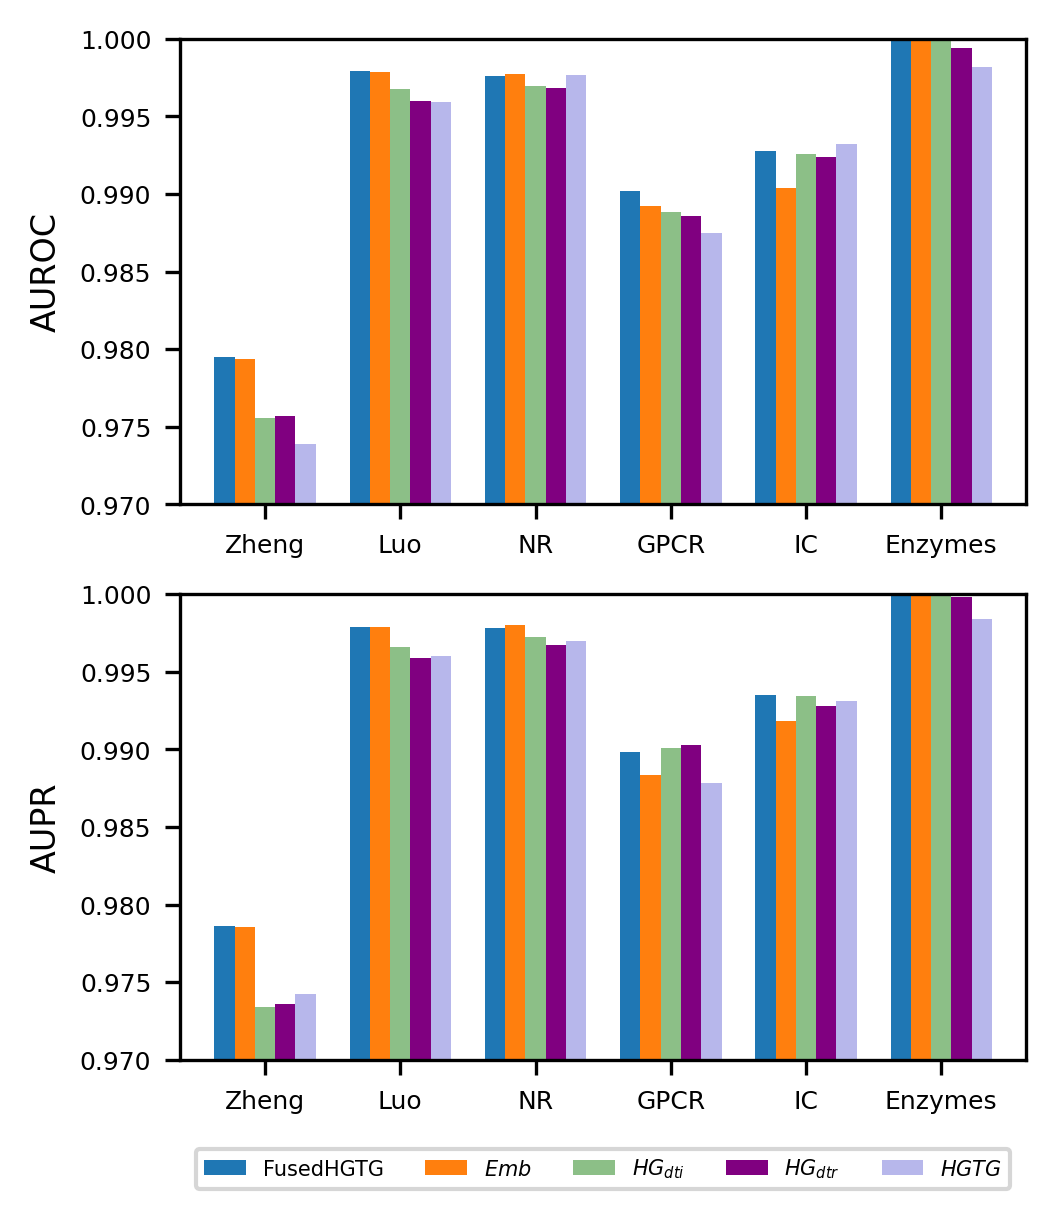

In [ ]:
auroc_data = {
    'Dataset': ['Zheng', 'Luo',   'NR','GPCR', 'IC','Enzymes'],
    'FusedHGTG':[0.9795, 0.9979, 0.9976, 0.9902, 0.9928, 1],
     r'$Emb $': [0.97934, 0.99788, 0.99776, 0.98922, 0.99036, 1.0000],
     r'$HG_{dti} $': [0.97554, 0.99674, 0.99698, 0.98886, 0.99258, 1.0000],
    r'$HG_{dtr} $': [0.9757, 0.99602, 0.9968, 0.98856, 0.9924, 0.99938],
    r'$HGTG$':[0.9739, 0.9959, 0.9977, 0.9875, 0.9932, 0.9982] 
}

aupr_data = {
    'Dataset': ['Zheng', 'Luo',   'NR','GPCR', 'IC','Enzymes'],
    'FusedHGTG':[0.9786, 0.9979, 0.9978, 0.9898, 0.9935, 1],
     r'$Emb $': [0.97852, 0.99788, 0.99798, 0.98834, 0.9918, 1.0000], 
    r'$HG_{dti} $':  [0.9734, 0.9966, 0.99724, 0.99008, 0.99346, 1.0000],
    r'$HG_{dtr} $': [0.9736, 0.9959, 0.9967, 0.9903, 0.9928, 0.9998],
    r'$HGTG $': [0.97422, 0.99598, 0.997, 0.98784, 0.99314, 0.9984],
}

df_auroc = pd.DataFrame(auroc_data)
df_aupr = pd.DataFrame(aupr_data)

# 设置全局字体大小
plt.rcParams.update({'font.size': 6})  # 设置默认字体大小

# 创建两个图表，一个用于AUROC，一个用于AUPR
#fig, axes = plt.subplots(2, 1, figsize=(3.5,4), dpi=300)
fig, axes = plt.subplots(2, 1, figsize=(3.5,4), dpi=300)
colors = ['#1f77b4', '#ff7f0e', '#8cBF87',   'purple','#B7B7EB', 'brown', 'pink', 'cyan']

# 绘制AUROC均值条形图
df_auroc.set_index('Dataset').plot(kind='bar', ax=axes[0], width=0.75,color=colors)
axes[0].set_ylabel('AUROC', fontsize=8)  # Y轴标签字体
axes[0].set_xticklabels(df_auroc['Dataset'], rotation=0)  # X轴刻度字体
axes[0].set_ylim([0.97, 1.00])
axes[0].set_xlabel('') 
axes[0].legend().remove()


# 绘制AUPR均值条形图
df_aupr.set_index('Dataset').plot(kind='bar', ax=axes[1], width=0.75, color=colors)
axes[1].set_ylabel('AUPR', fontsize=8)  # Y轴标签字体
axes[1].set_xticklabels(df_aupr['Dataset'], rotation=0)  # X轴刻度字体
axes[1].set_ylim([0.97, 1.00])
axes[1].set_xlabel('') 
axes[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=5, fontsize=5)  # 图例字体


# 图形布局调整
plt.tight_layout()
plt.savefig('/data/zyf/HyperGCN-DTI/Figures/2-Revised_Figure4.tif', dpi=300)
plt.show()

/tmp/ipykernel_2297423/3918471419.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


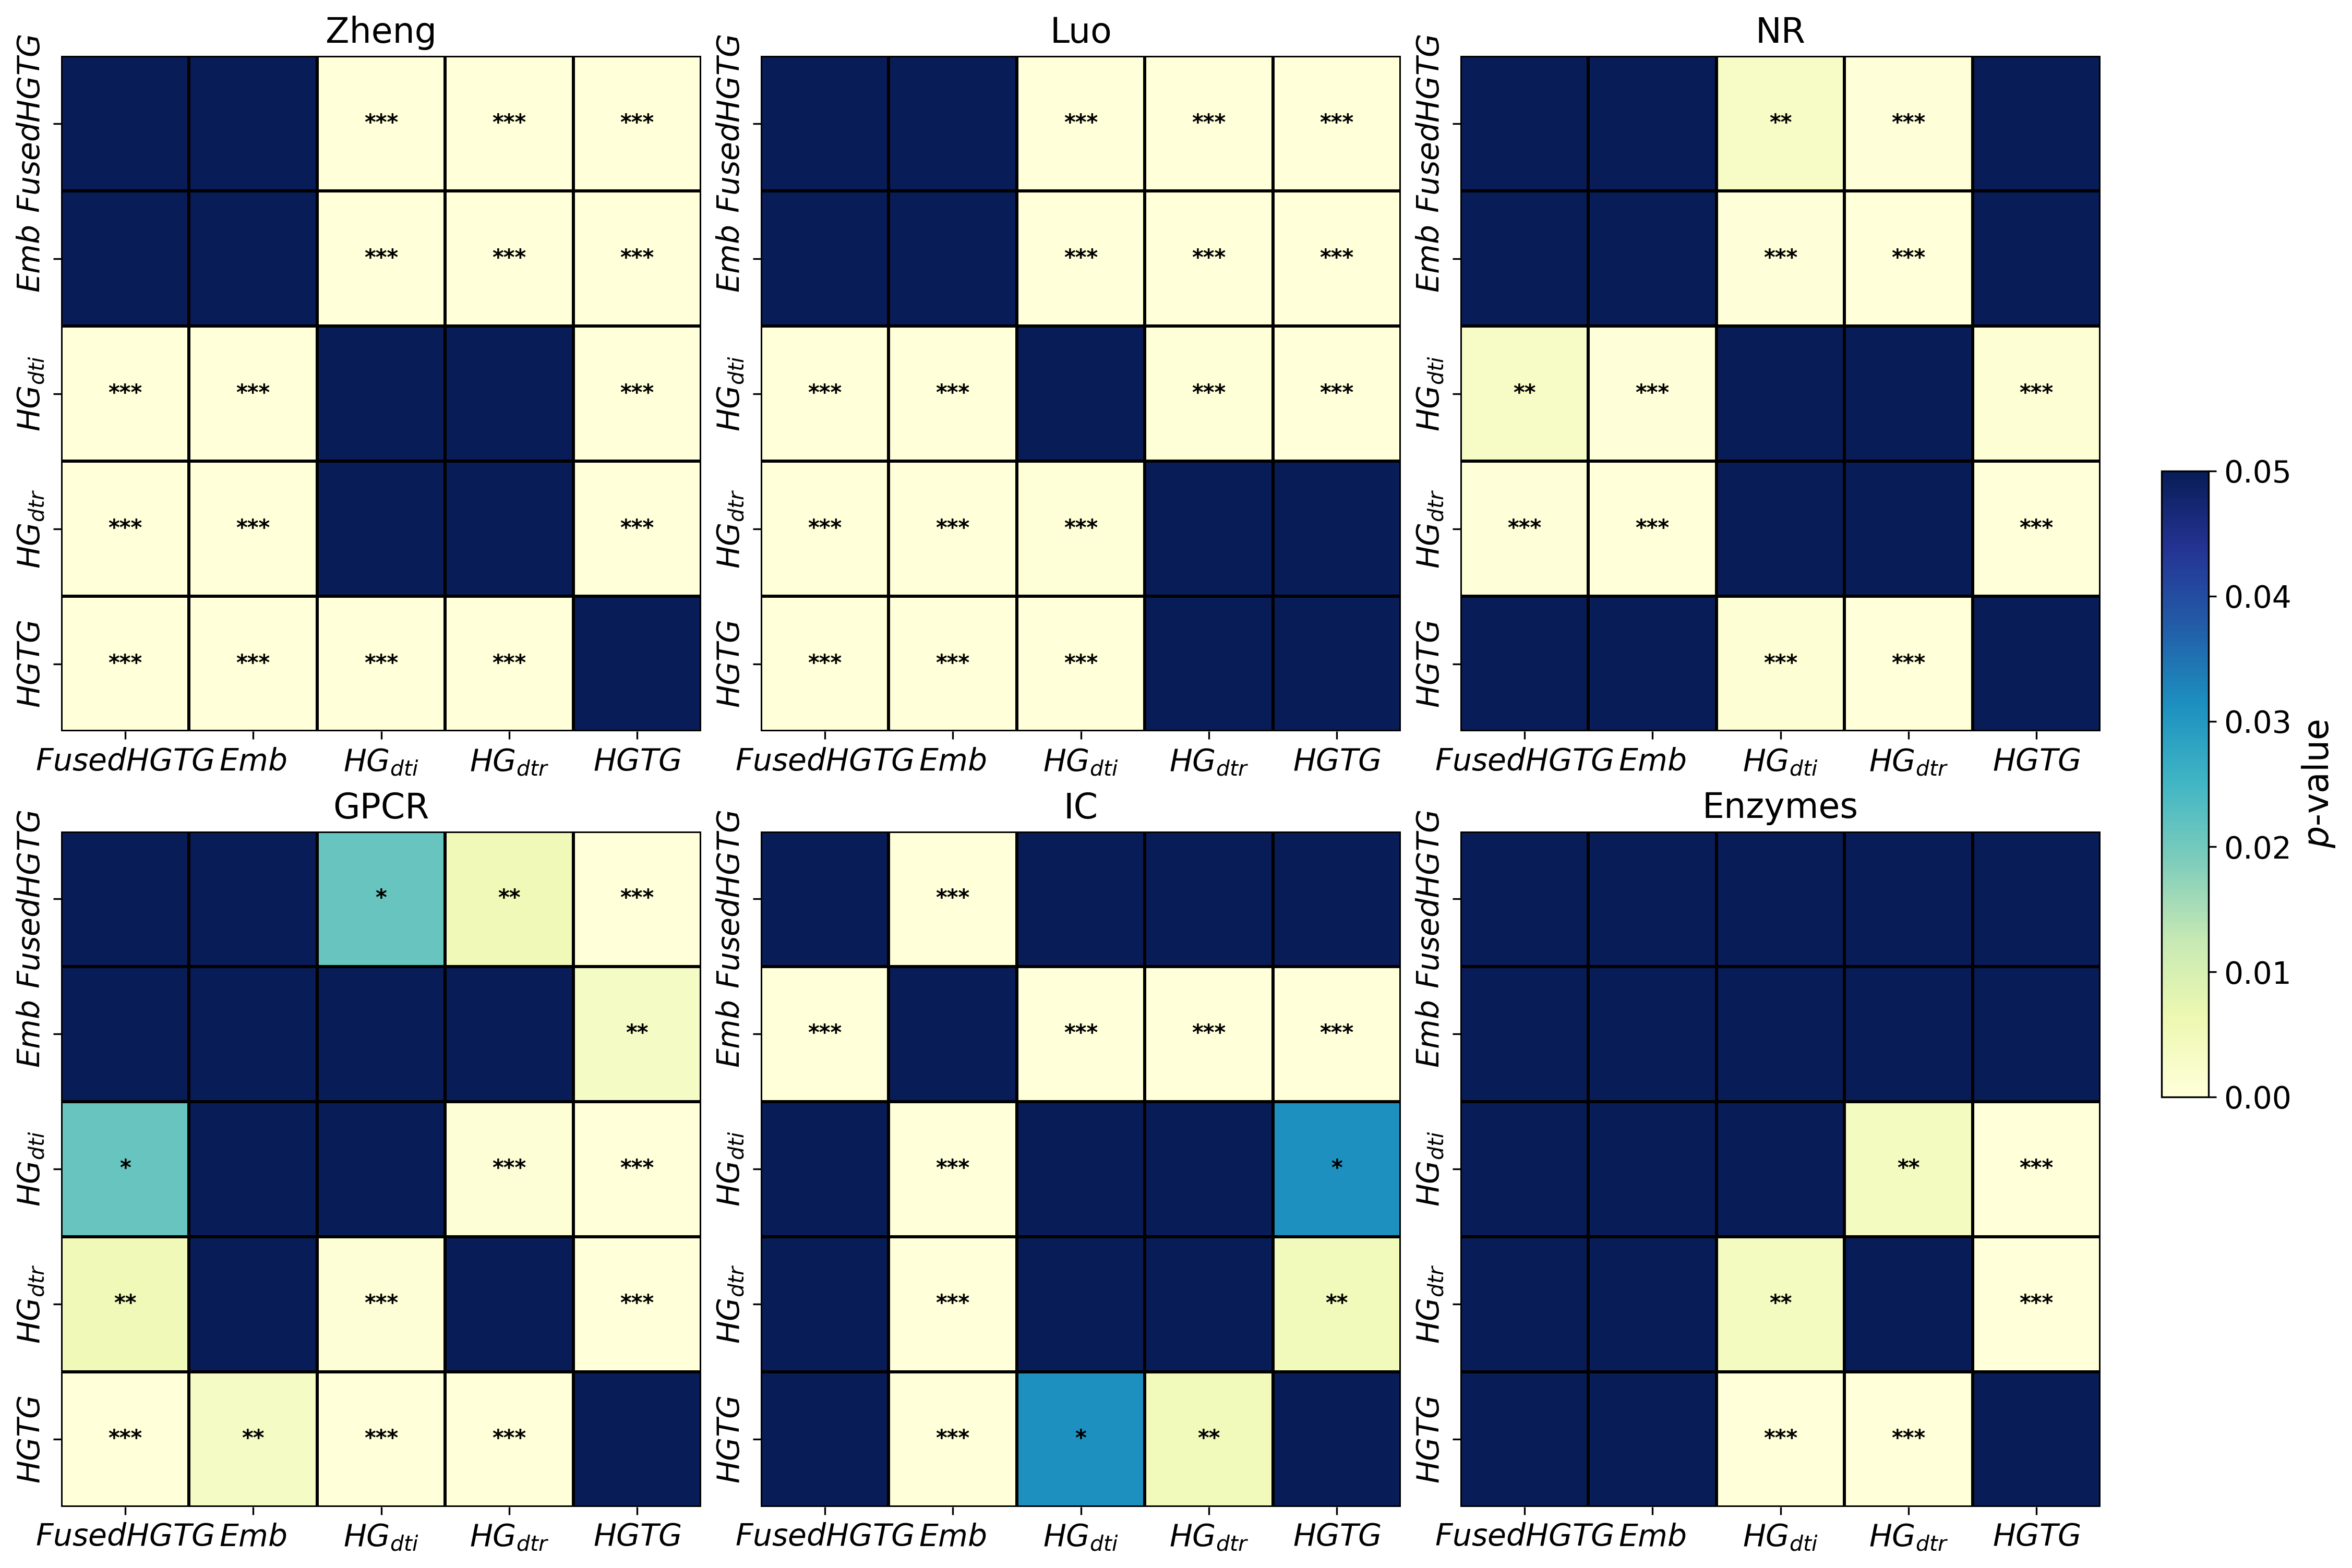

In [50]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns  

# 你的数据
data = {
    'Feature Type': [r'$FusedHGTG$']*7 + [r'$Emb $']*7 + [ r'$HG_{dti} $']*7 + [r'$HG_{dtr} $']*7 + [r'$HGTG$']*7,
    'Dataset': ['Zheng', 'Luo', 'NR', 'GPCR', 'IC', 'Enzymes', 'All']*5,
    'Average': [0.9795, 0.9979, 0.9976, 0.9902, 0.9928, 1.0000, 0.9930,
                0.97934, 0.99788, 0.99776, 0.98922, 0.99036, 1.00000, 0.9924,
                0.97554, 0.99674, 0.99698, 0.98886, 0.99258, 1.00000, 0.9918,
                0.9757, 0.99602, 0.9968, 0.98856, 0.9924, 0.99938, 0.9915,
                0.9739, 0.9959, 0.9977, 0.9875, 0.9932, 0.9982, 0.9911],
    'Standard error': [0.000110, 0.000130, 0.000140, 0.000560, 0.000190, 0.00090, 0.000910,
                       0.000100, 0.000140, 0.000135, 0.000556, 0.000192, 0.00090, 0.0001050,
                       0.000110, 0.000135, 0.000140, 0.0000600, 0.000210, 0.000140, 0.000950,
                       0.000100, 0.000138, 0.000142, 0.0000580, 0.000197, 0.000150, 0.00088,
                       0.000150, 0.000148, 0.000145, 0.0000500, 0.000185, 0.000150, 0.000900]
}

df = pd.DataFrame(data)

# 进行配对 t 检验
datasets = df['Dataset'].unique()
feature_types = df['Feature Type'].unique()
num_feature_types = len(feature_types)

results = {}

for dataset in datasets:
    dataset_df = df[df['Dataset'] == dataset].copy()
    p_values = np.ones((num_feature_types, num_feature_types))
    t_values = np.zeros((num_feature_types, num_feature_types))
    
    for i, feature1 in enumerate(feature_types):
        row1 = dataset_df[dataset_df['Feature Type'] == feature1]
        mean1 = row1['Average'].values[0]
        se1 = row1['Standard error'].values[0]
        for j, feature2 in enumerate(feature_types):
            if i != j:
                row2 = dataset_df[dataset_df['Feature Type'] == feature2]
                mean2 = row2['Average'].values[0]
                se2 = row2['Standard error'].values[0]
                t_stat = (mean1 - mean2) / np.sqrt(se1**2 + se2**2)
                n = 50
                df_value = n - 1
                p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=df_value))
                
                t_values[i, j] = t_stat
                p_values[i, j] = p_value

    results[dataset] = {
        'p_values': pd.DataFrame(p_values, index=feature_types, columns=feature_types),
        't_values': pd.DataFrame(t_values, index=feature_types, columns=feature_types)
    }


# 创建 (2,3) 的子图网格
fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=300)

heatmap_list = []

for ax, dataset in zip(axes.flatten(), datasets):
    if dataset != 'All':
        # 取出当前 dataset 的 p-values
        pvals = results[dataset]['p_values']
        #print(pvals.dtypes)
        # 生成星星矩阵
        stars = pvals.copy()
        stars = stars.applymap(lambda x: 
                               '***' if isinstance(x, (int, float)) and x < 0.001 else 
                               '**' if isinstance(x, (int, float)) and x < 0.01 else 
                               '*' if isinstance(x, (int, float)) and x < 0.05 else 
                               '')
        
        # 绘制热图（底色是 p-value，annot 是星星）
        hm = sns.heatmap(
            pvals,
            annot=stars,          # 标注的是星星，不是p值
            fmt='s',              # 格式是字符串
            cmap="YlGnBu",       # 颜色倒过来，p小颜色深
            vmax=0.05,             # 设定最大值
            vmin=0,                # 设定最小值
            cbar=False,            # 后面统一加 colorbar
            ax=ax,
            linewidths=1,
            linecolor='black',
            annot_kws={"size": 10, "color": "black", "weight": "bold"}
        )
        
        heatmap_list.append(hm)
        ax.set_title(f'{dataset}', fontsize=16)
        #ax.set_xlabel('Feature Type', fontsize=12)
        #ax.set_ylabel('Feature Type', fontsize=12)
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
    else:
        ax.axis('off')

# --- 添加统一 colorbar ---
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
cbar = fig.colorbar(heatmap_list[-1].collections[0], cax=cbar_ax)
cbar.set_label(r'$p$-value', fontsize=16)
cbar.ax.tick_params(labelsize=14)

# 调整整体布局
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('all_paired_ttest_heatmaps_final_dynamicstars.tif', dpi=300)
plt.show()



Zheng数据集上的配对t检验p值：
           FusedHGTG     Emb   HGdti   HGdtr  HGTG
FusedHGTG     1.0000  0.2871  0.0000  0.0000   0.0
Emb           0.2871  1.0000  0.0000  0.0000   0.0
HGdti         0.0000  0.0000  1.0000  0.2871   0.0
HGdtr         0.0000  0.0000  0.2871  1.0000   0.0
HGTG          0.0000  0.0000  0.0000  0.0000   1.0

Zheng数据集上的显著性差异(p < 0.05)：
           FusedHGTG    Emb  HGdti  HGdtr   HGTG
FusedHGTG      False  False   True   True   True
Emb            False  False   True   True   True
HGdti           True   True  False  False   True
HGdtr           True   True  False  False   True
HGTG            True   True   True   True  False

Luo数据集上的配对t检验p值：
           FusedHGTG     Emb   HGdti   HGdtr    HGTG
FusedHGTG     1.0000  0.9171  0.0000  0.0000  0.0000
Emb           0.9171  1.0000  0.0000  0.0000  0.0000
HGdti         0.0000  0.0000  1.0000  0.0005  0.0001
HGdtr         0.0000  0.0000  0.0005  1.0000  0.5559
HGTG          0.0000  0.0000  0.0001  0.5559  1.0000

Luo数据集上的显著性差异(p

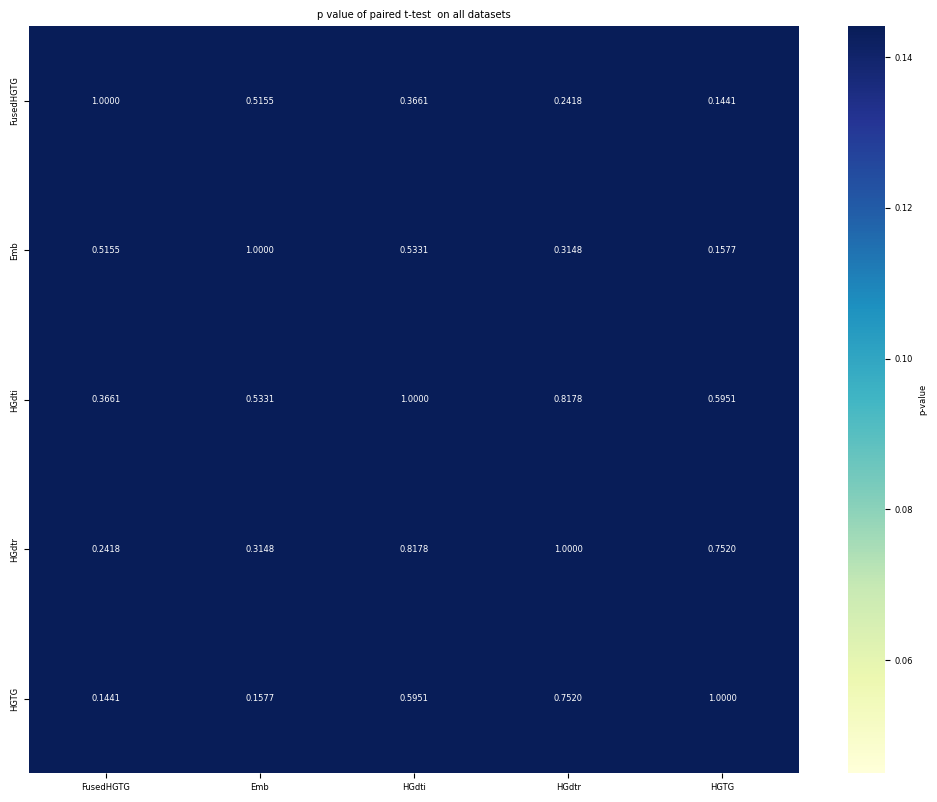

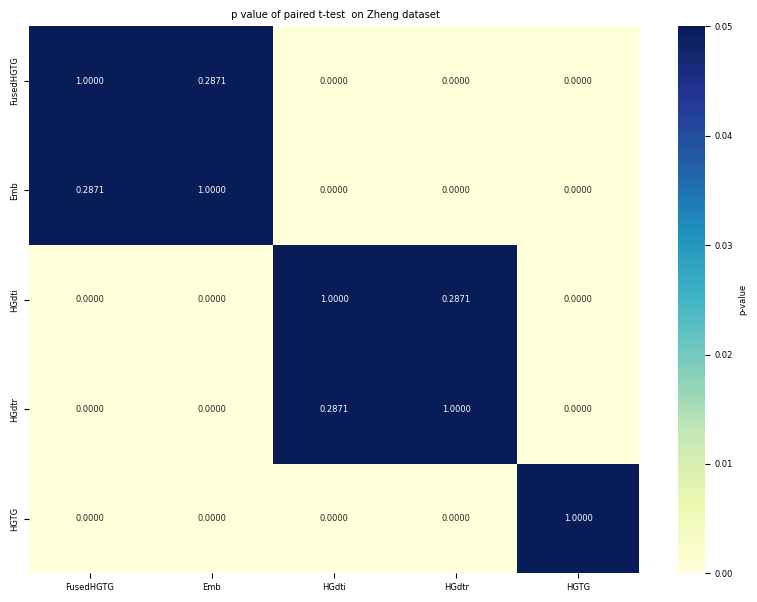

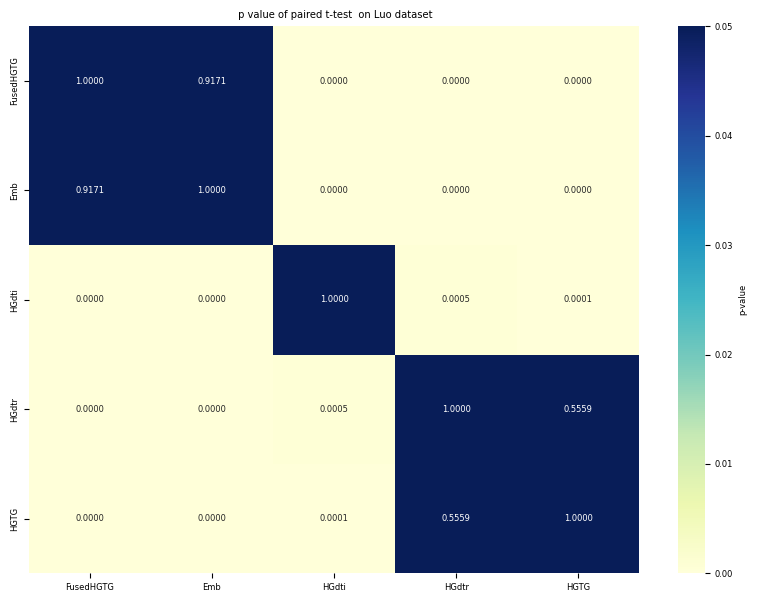

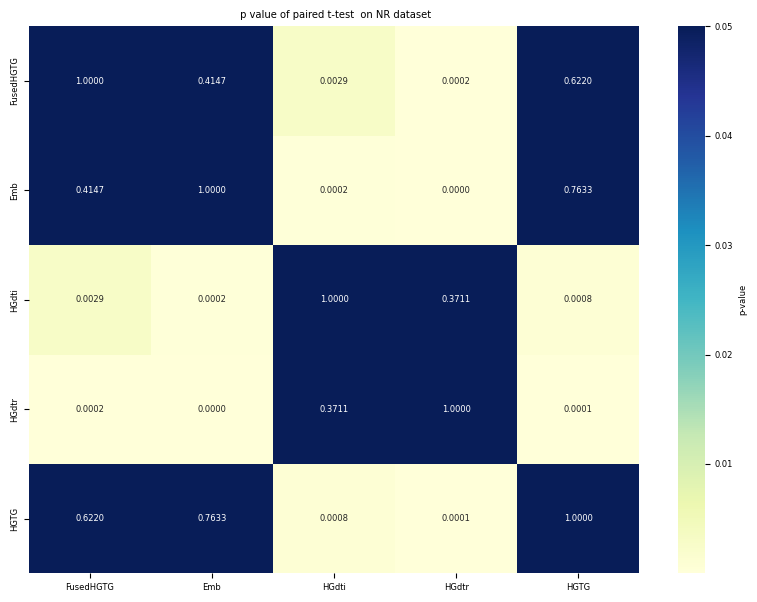

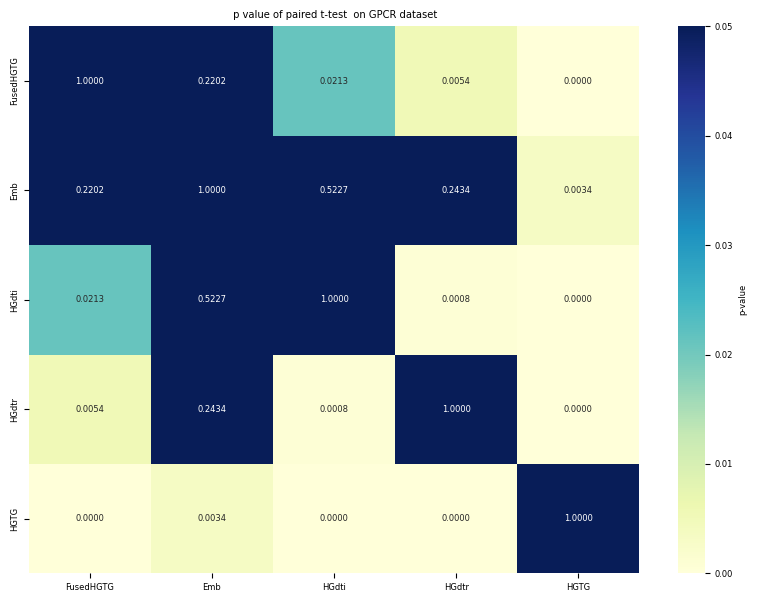

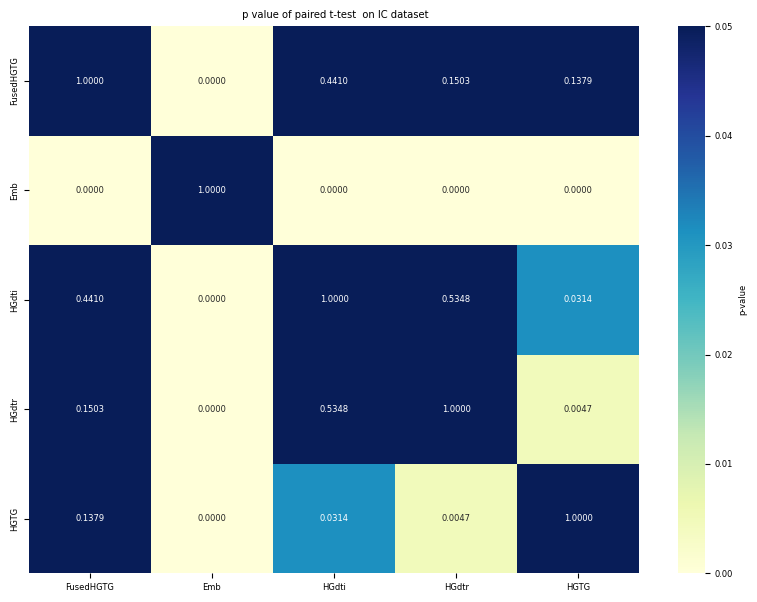

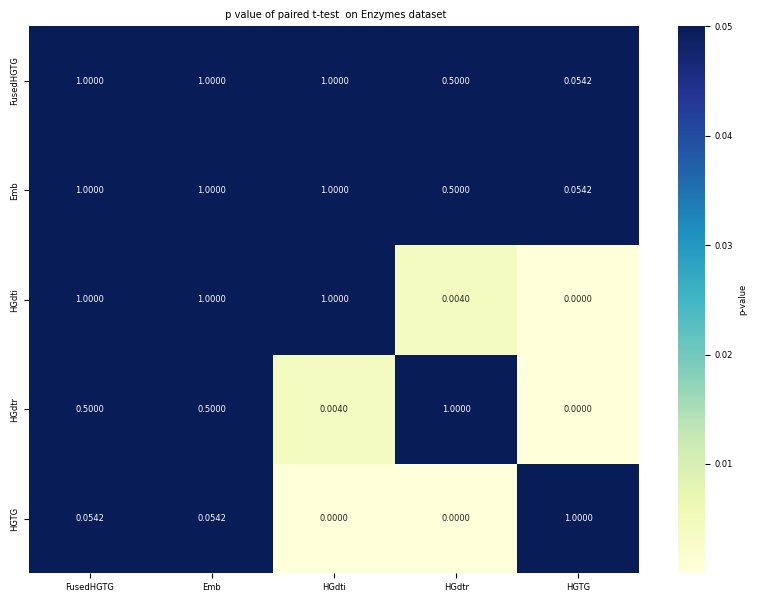

In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns  

# 手动创建数据框
data = {
    'Feature Type': ['FusedHGTG']*7 + ['Emb']*7 + ['HGdti']*7 + ['HGdtr']*7 + ['HGTG']*7,
    'Dataset': ['Zheng', 'Luo', 'NR', 'GPCR', 'IC', 'Enzymes', 'All']*5,
    'Average': [0.9795, 0.9979, 0.9976, 0.9902, 0.9928, 1.0000, 0.9930,
                0.97934, 0.99788, 0.99776, 0.98922, 0.99036, 1.00000, 0.9924,
                0.97554, 0.99674, 0.99698, 0.98886, 0.99258, 1.00000, 0.9918,
                0.9757, 0.99602, 0.9968, 0.98856, 0.9924, 0.99938, 0.9915,
                0.9739, 0.9959, 0.9977, 0.9875, 0.9932, 0.9982, 0.9911],
    'Standard error': [0.000110, 0.000130, 0.000140, 0.000560, 0.000190, 0.00090, 0.000910,
                       0.000100, 0.000140, 0.000135, 0.000556, 0.000192, 0.00090, 0.0001050,
                       0.000110, 0.000135, 0.000140, 0.0000600, 0.000210, 0.000140, 0.000950,
                       0.000100, 0.000138, 0.000142, 0.0000580, 0.000197, 0.000150, 0.00088,
                       0.000150, 0.000148, 0.000145, 0.0000500, 0.000185, 0.000150, 0.000900]
}

df = pd.DataFrame(data)

# 针对每个数据集进行配对t检验
datasets = df['Dataset'].unique()
feature_types = df['Feature Type'].unique()
num_feature_types = len(feature_types)

# 创建存储结果的字典
results = {}

for dataset in datasets:
    # 提取当前数据集的数据
    dataset_df = df[df['Dataset'] == dataset].copy()
    #print(dataset)
    # 为当前数据集创建p值矩阵
    p_values = np.ones((num_feature_types, num_feature_types))
    t_values = np.zeros((num_feature_types, num_feature_types))
    
    # 进行配对t检验
    for i, feature1 in enumerate(feature_types):
        row1 = dataset_df[dataset_df['Feature Type'] == feature1]
        mean1 = row1['Average'].values[0]
        se1 = row1['Standard error'].values[0]
        #print(mean1,se1)
        for j, feature2 in enumerate(feature_types):

            if i != j:
                row2 = dataset_df[dataset_df['Feature Type'] == feature2]
                mean2 = row2['Average'].values[0]
                se2 = row2['Standard error'].values[0]
                #print(mean2,se2)
                t_stat = (mean1 - mean2) / np.sqrt(se1**2 + se2**2)
                # 双尾 p 值
                n = 50
                df_value = n - 1
                p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=df_value))
                
                t_values[i, j] = t_stat
                p_values[i, j] = p_value
                #print(t_stat,p_value)
    # 存储结果
    results[dataset] = {
        'p_values': pd.DataFrame(p_values, index=feature_types, columns=feature_types),
        't_values': pd.DataFrame(t_values, index=feature_types, columns=feature_types)
    }
#print(results)
# 打印每个数据集的配对t检验结果
for dataset, result in results.items():
    print(f"\n{dataset}数据集上的配对t检验p值：")
    print(result['p_values'].round(4))
    
    # 显示显著性差异
    significant = result['p_values'] < 0.1
    print(f"\n{dataset}数据集上的显著性差异(p < 0.05)：")
    print(significant)


# 为每个数据集创建单独的热图
for dataset in datasets:
    if dataset != 'All':
        plt.figure(figsize=(8, 6))
        sns.heatmap(results[dataset]['p_values'], annot=True, fmt=".4f", cmap="YlGnBu",
                    vmax=0.05, cbar_kws={'label': 'p-value'})
        plt.title(f' p value of paired t-test  on {dataset} dataset')
        plt.tight_layout()
        plt.savefig(f'paired_ttest_{dataset}.png', dpi=300)

In [5]:
import pandas as pd
import numpy as np

# 读取数据
df = pd.read_csv('../Cross_Validation_Results.csv')

# 按数据集分组计算统计量
def add_statistics(group):
    stats = {
        '平均值': group.mean(),
        '标准差': group.std(),
        '最大值': group.max(),
        '最小值': group.min(),
        '中位数': group.median(),
        '95%置信区间': [
            group.mean() - 1.96 * group.std() / np.sqrt(len(group)),
            group.mean() + 1.96 * group.std() / np.sqrt(len(group))
        ]
    }
    return pd.DataFrame(stats)

# 对AUROC和AUPR指标进行分析
metrics = ['AUROC', 'AUPR']
results = {}
overall_results = {}

for metric in metrics:
    # 按数据集分组的统计
    stats = df.groupby('Dataset')[metric].agg([
        ('平均值', 'mean'),
        ('标准差', 'std'),
        ('最大值', 'max'),
        ('最小值', 'min'),
        ('中位数', 'median')
    ])
    # 计算95%置信区间
    stats['置信区间下限'] = stats['平均值'] - 1.96 * stats['标准差'] / np.sqrt(5)
    stats['置信区间上限'] = stats['平均值'] + 1.96 * stats['标准差'] / np.sqrt(5)
    results[metric] = stats
    
    # 所有数据集的整体统计
    overall_stats = pd.Series({
        '总体平均值': df[metric].mean(),
        '总体标准差': df[metric].std(),
        '总体最大值': df[metric].max(),
        '总体最小值': df[metric].min(),
        '总体中位数': df[metric].median(),
        '总体置信区间下限': df[metric].mean() - 1.96 * df[metric].std() / np.sqrt(len(df)),
        '总体置信区间上限': df[metric].mean() + 1.96 * df[metric].std() / np.sqrt(len(df))
    })
    overall_results[metric] = overall_stats

# 打印每个指标的统计结果
for metric, stats in results.items():
    print(f"\n{metric}的各数据集统计分析结果：")
    print(stats.round(4))
    print(f"\n{metric}的总体统计分析结果：")
    print(overall_results[metric].round(4))


AUROC的各数据集统计分析结果：
            平均值     标准差     最大值     最小值     中位数  置信区间下限  置信区间上限
Dataset                                                        
Es       0.9968  0.0009  0.9981  0.9956  0.9967  0.9960  0.9976
GPCRs    0.9926  0.0056  0.9981  0.9843  0.9944  0.9876  0.9975
ICs      0.9934  0.0019  0.9962  0.9911  0.9937  0.9917  0.9951
Luo      0.9960  0.0013  0.9972  0.9938  0.9965  0.9948  0.9972
NRs      0.9994  0.0014  1.0000  0.9969  1.0000  0.9982  1.0006
Zheng    0.9757  0.0011  0.9768  0.9742  0.9754  0.9748  0.9766

AUROC的总体统计分析结果：
总体平均值       0.9923
总体标准差       0.0082
总体最大值       1.0000
总体最小值       0.9742
总体中位数       0.9960
总体置信区间下限    0.9894
总体置信区间上限    0.9953
dtype: float64

AUPR的各数据集统计分析结果：
            平均值     标准差     最大值     最小值     中位数  置信区间下限  置信区间上限
Dataset                                                        
Es       0.9970  0.0007  0.9982  0.9963  0.9968  0.9964  0.9976
GPCRs    0.9928  0.0060  0.9982  0.9834  0.9950  0.9876  0.9981
ICs      0.9941  0.0017  0.996